        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635        

<AxesSubplot:xlabel='Day', ylabel='TOTAL'>

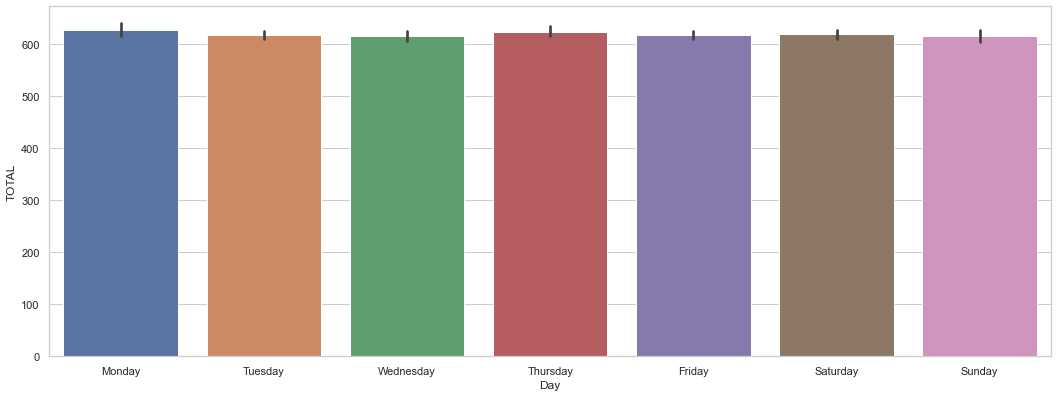

In [36]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt



dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")
#df = pd.read_csv(file, parse_dates=['T'], index_col=['T'])

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek


print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "TOTAL", data = dailycollection )




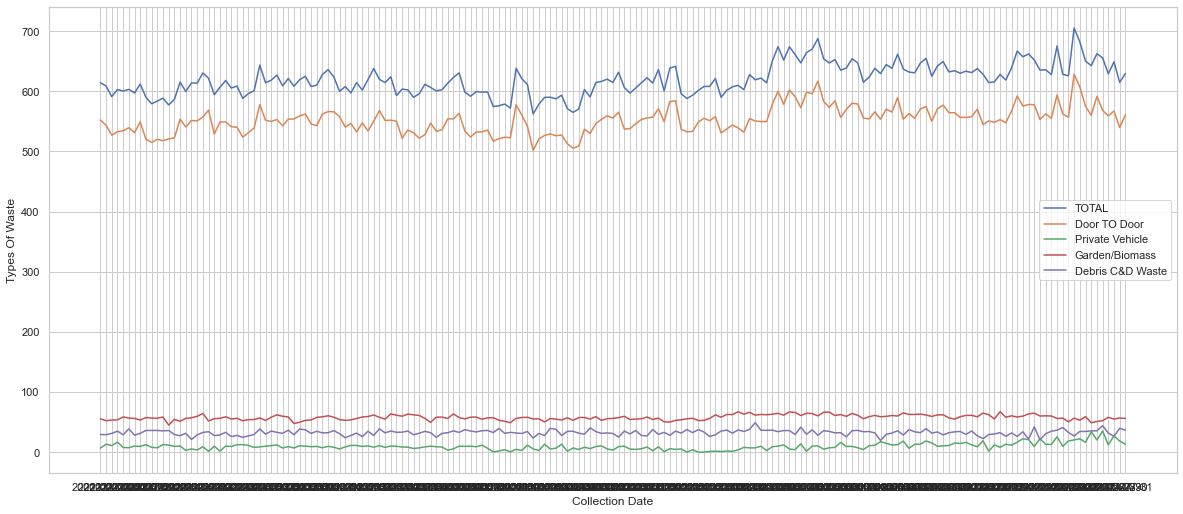

In [37]:
sns.lineplot(data=dailycollection, x="Collection Date", y="TOTAL")

sns.lineplot(data=dailycollection, x="Collection Date", y="Door TO Door")


sns.lineplot(data=dailycollection, x="Collection Date", y="PRIVATE Vehicle")


sns.lineplot(data=dailycollection, x="Collection Date", y="GARDEN/Biomass")

p = sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")

p.set_ylabel("Types Of Waste")

plt.legend(labels=["TOTAL","Door TO Door","Private Vehicle","Garden/Biomass","Debris C&D Waste"])



# Dickey Fuller Test

,Door TO Door,GARDEN/Biomass,PRIVATE Vehicle,TOTAL,DEBRIS C&D Waste,Day_Index
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,552.260110,57.675387,9.427901,619.257790,32.407845,2.983425
std,21.774843,4.295787,5.738178,25.544795,4.519328,1.998542
min,501.555000,44.815000,0.000000,562.025000,19.240000,0.000000
25%,536.685000,54.925000,5.665000,601.210000,29.270000,1.000000
50%,551.785000,57.665000,9.280000,615.550000,32.440000,3.000000
75%,565.130000,60.845000,11.880000,635.650000,35.330000,5.000000
max,628.425000,67.245000,34.990000,705.220000,48.950000,6.000000


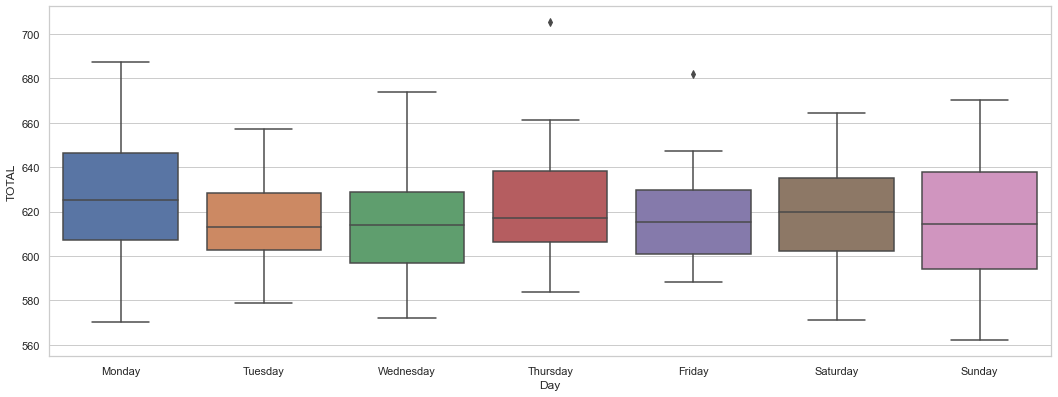

In [38]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['TOTAL'])
dailycollection.describe()

<AxesSubplot:xlabel='Collection Date', ylabel='TOTAL'>

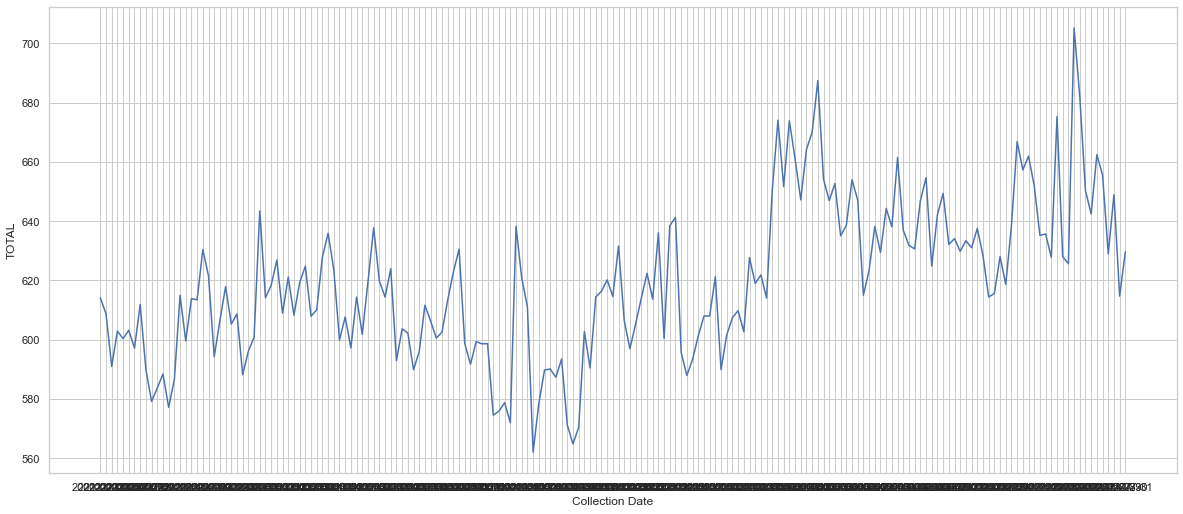

In [39]:
sns.lineplot(data=dailycollection, x="Collection Date", y="TOTAL")


# Time Series Data Analysis of Garbage Collection Data 

In [40]:
dailycollection_idx = dailycollection[:]

print(min(dailycollection_idx["Collection Date"]))
print(max(dailycollection_idx['Collection Date']))

#Sorting by date
dailycollection_idx = dailycollection_idx.sort_values('Collection Date')
dailycollection_idx['Collection Date'] = pd.to_datetime(dailycollection_idx['Collection Date'])


2021-02-01
2021-07-31


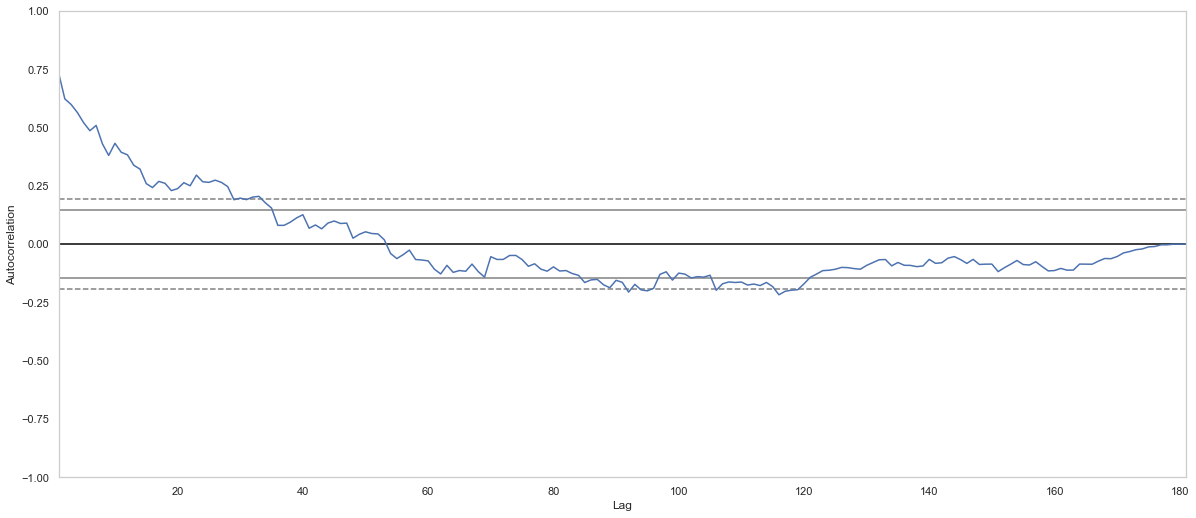

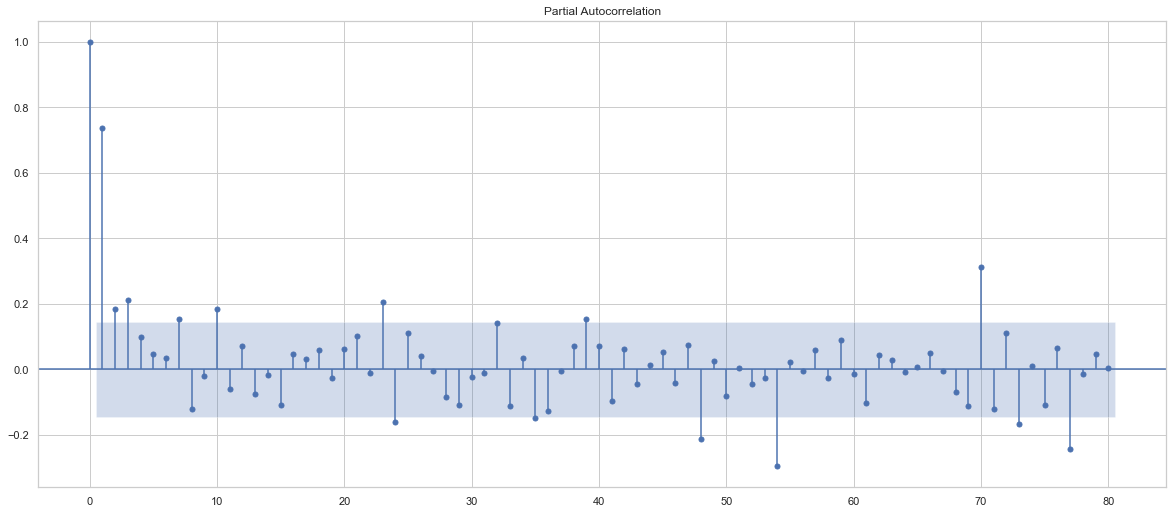

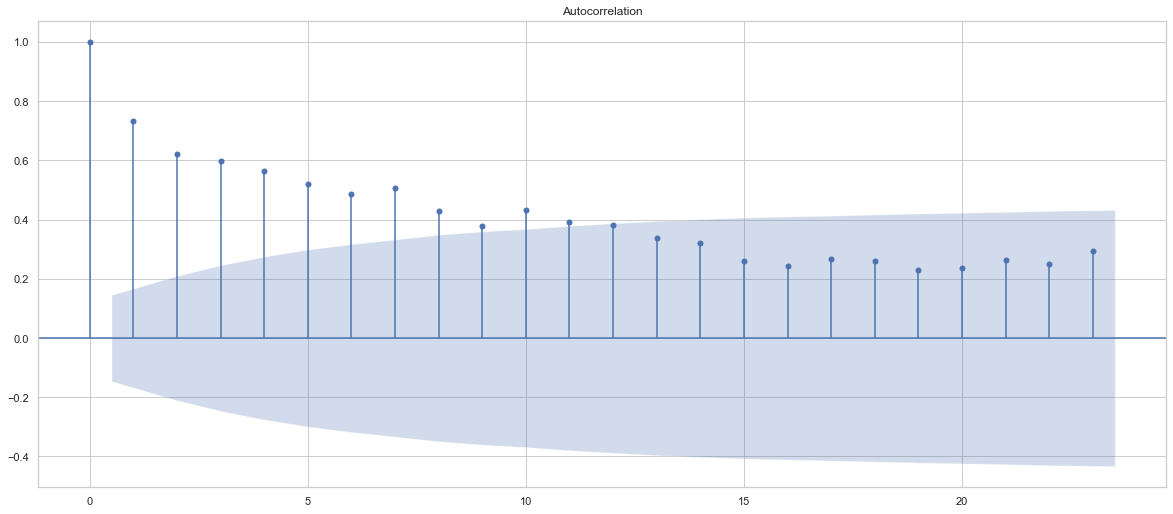

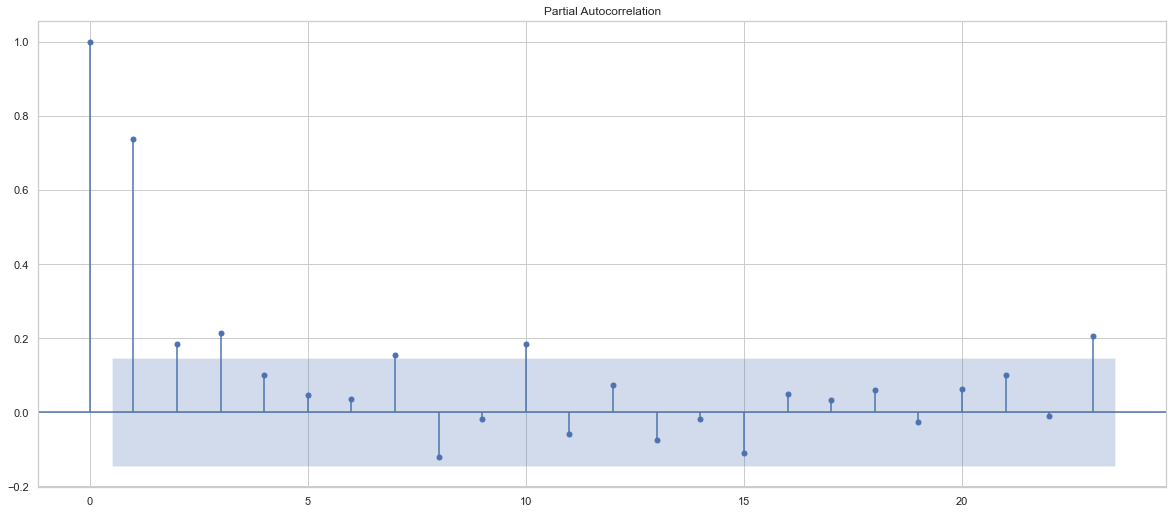

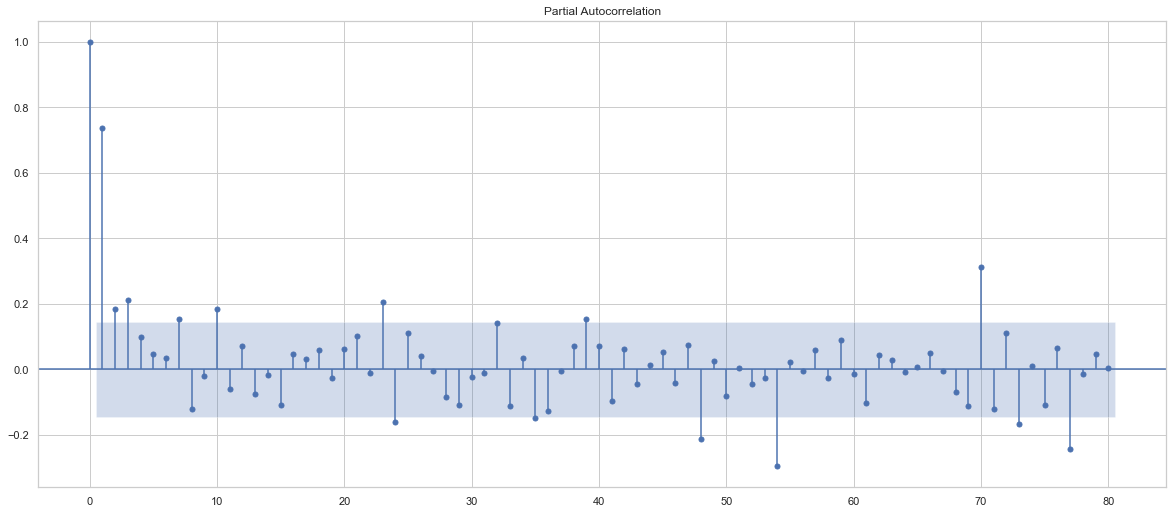

In [41]:
# # Creating Autocorrelation plot

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dailycollection_idx['TOTAL'])

plt.show()

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(dailycollection_idx['TOTAL'])
plot_pacf(dailycollection_idx['TOTAL'])
plot_pacf(dailycollection_idx['TOTAL'], lags = 80)

In [42]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Collection Date
2021-02-01    614.100
2021-02-02    608.700
2021-02-03    590.950
2021-02-04    602.875
2021-02-05    600.310
               ...   
2021-07-27    655.500
2021-07-28    628.920
2021-07-29    648.920
2021-07-30    614.680
2021-07-31    629.675
Freq: D, Name: TOTAL, Length: 181, dtype: float64


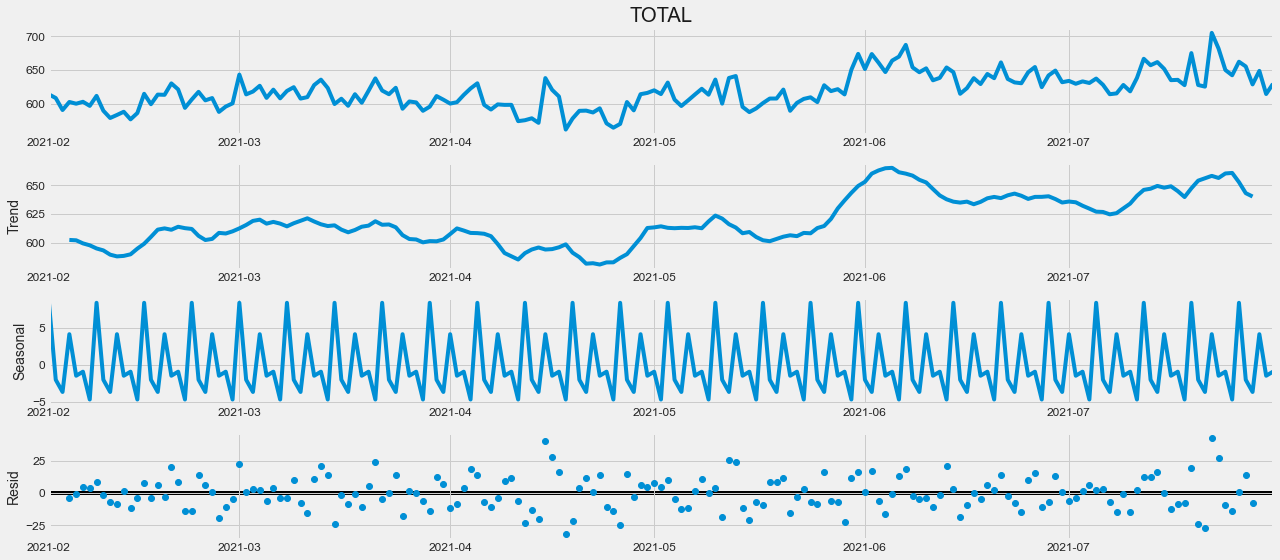

In [43]:
from pylab import rcParams

#Resample using the average of daily garbage collection. However in this case the daily average would be same because it is one record .
daily_resampled = dailycollection_idx.reset_index().set_index("Collection Date").resample('D')['TOTAL'].sum()
print(daily_resampled)

#Seasonality Patterns
rcParams['figure.figsize'] = [18,8]

# Seasonal Decomposition by Moving Averages
decomposition = sm.tsa.seasonal_decompose(daily_resampled, model='additive')
fig = decomposition.plot()
plt.show()


In [ ]:
#p = Seasonality , d = Trend and q = Noise
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [45]:
aic_result = []
param_min_aci = {}
for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])

5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:2827.4082566798043
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2508.4418602486803
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1607.0465564659196
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1507.2090079636773
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1617.030038792238
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1562.166929291937
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1531.561935986082
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1508.5990038850166
5 Months Sample ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:2575.7091061955207
5 Months Sample ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:2298.677810110486
5 Months Sample ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:1553.8801154217306
5 Months Sample ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:1442.67115654985
5 Months Sample ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:1624.7926277436577
5 Months Sample ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:1491.7463638464724
5 Months Sample ARIMA(0, 0, 1)x(1, 1, 0,

                                     SARIMAX Results                                     
Dep. Variable:                             TOTAL   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -696.191
Date:                           Tue, 30 Nov 2021   AIC                           1400.381
Time:                                   22:16:52   BIC                           1412.780
Sample:                               02-01-2021   HQIC                          1405.415
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4614      0.124      3.723      0.000       0.218       0.704
ma.L1         -0.8713      0.062    -13.946

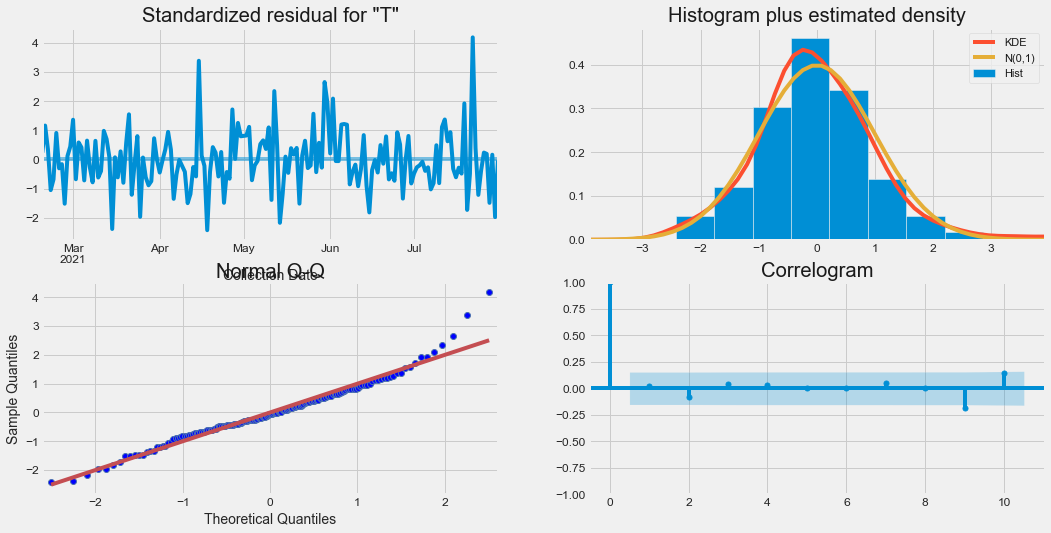

In [46]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12    )12 - AIC:1400.381022903781 for - Total
#Fit the model for the least value for optimal option
mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())
results.plot_diagnostics(figsize=(16, 8))
plt.show()

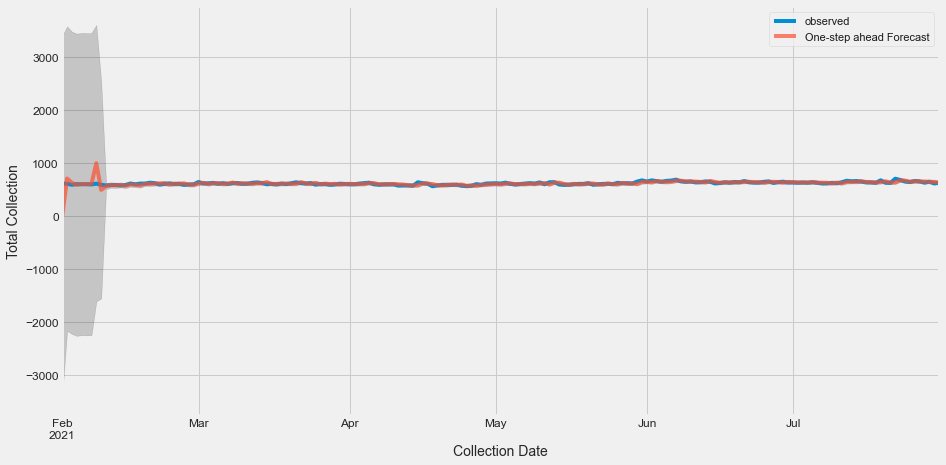

In [47]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection['Collection Date'][0]), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_resampled['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Collection Date')
ax.set_ylabel('Total Collection')
plt.legend()

plt.show()

In [48]:
y_forecasted_total = pred.predicted_mean
y_truth = daily_resampled[dailycollection['Collection Date'][0]:]

mse_total = ((y_forecasted_total - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_total, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_total), 2)))
mse_total = round(mse_total, 2)

total = {"mse":mse_total, "forecast": y_forecasted_total}
%store total

The Mean Squared Error of our forecasts is 3287.35
The Root Mean Squared Error of our forecasts is 57.34
Stored 'total' (dict)


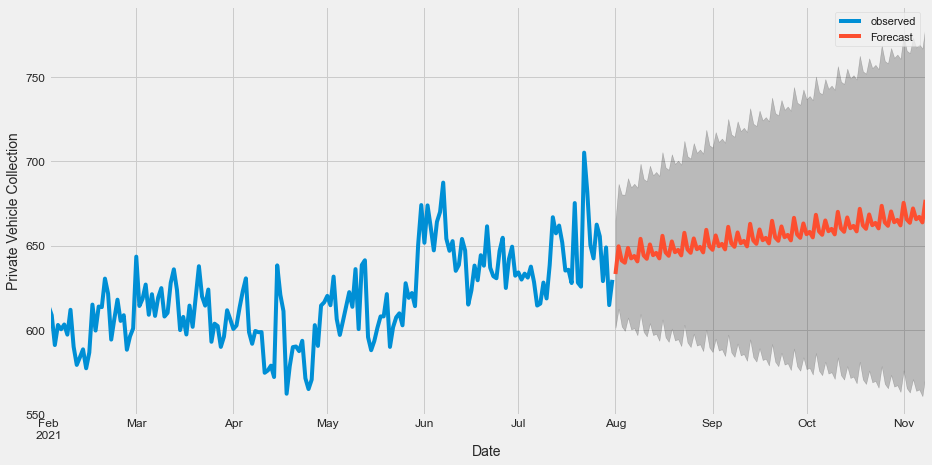

In [49]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Private Vehicle Collection')

plt.legend()
plt.show()

# Validating the one month forecast by splitting to 5:1 train to test ratio

In [50]:
idx = dailycollection_idx.loc[dailycollection_idx["Collection Date"] == '2021-06-30'].index[0]+1
dailycollection_train = daily_resampled[:idx]
dailycollection_test = daily_resampled[idx+1:]
aic_result = []
param_min_aci = {}
for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}".format( min(aic_result), param_min_aci[min(aic_result)]))


5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:2338.5224330525903
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2061.097463427816
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1310.7558912854256
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1226.0416598228458
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1320.5042616940673
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1283.3285843123094
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1243.9407249711962
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1227.5301514744936
5 Months Sample ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:2129.108330629065
5 Months Sample ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:1888.4560294984465
5 Months Sample ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:1267.25088916724
5 Months Sample ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:1173.010986883165
5 Months Sample ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:1285.8414601960135
5 Months Sample ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:1286.355217646265
5 Months Sample ARIMA(0, 0, 1)x(1, 1, 0,

In [51]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of our forecasts is 3895.27
The Root Mean Squared Error of our forecasts is 62.41


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3767      0.093     -4.053      0.000      -0.559      -0.195
ma.L2         -0.2375      0.095     -2.488      0.013      -0.425      -0.050
ma.S.L7       -2.1729    970.658     -0.002      0.998   -1904.628    1900.282
ma.S.L14       1.1729   1138.578      0.001      0.999   -2230.400    2232.745
sigma2       200.9963   1.95e+05      0.001      0.999   -3.82e+05    3.83e+05


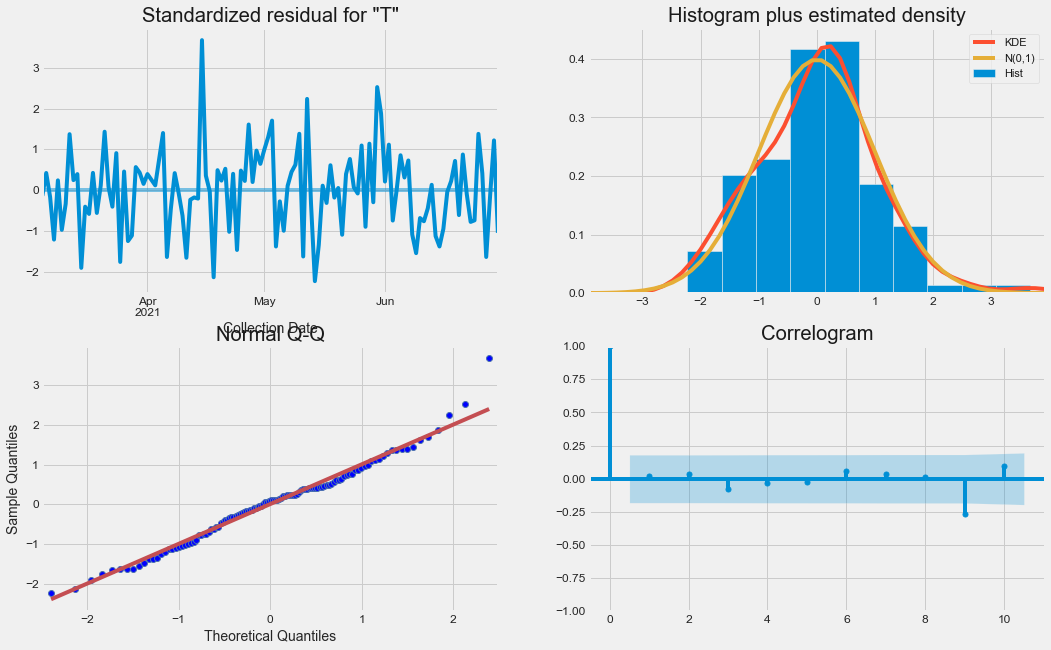

In [60]:
#AIC: 1128.9393312222614 Param: ((1, 1, 1), (0, 1, 1, 7))
#AIC: {} Param: {} 1040.3228732902626 ((0, 1, 2), (0, 2, 2, 7))

mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 10))
plt.show()


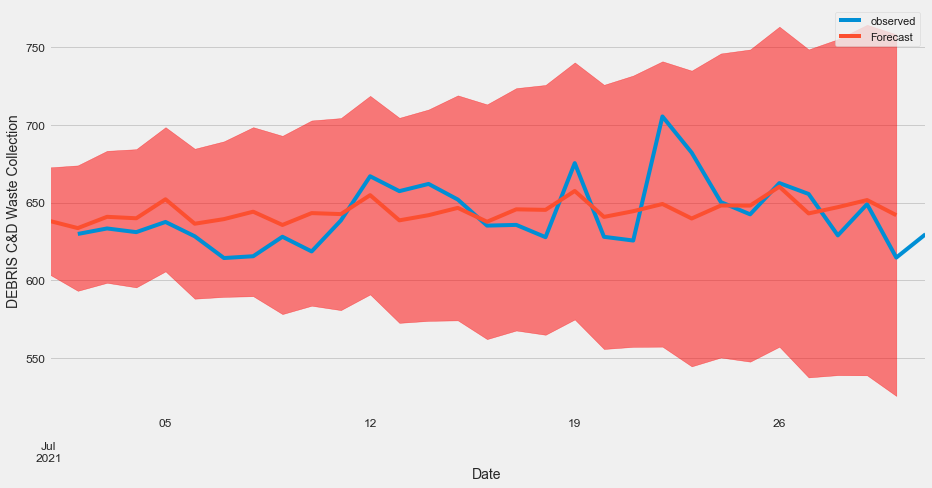

In [61]:
#Prediction Result Wrapper
pred_uc = results.get_forecast(steps=30)
#Confidence Interval
pred_ci = pred_uc.conf_int()

ax = dailycollection_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('DEBRIS C&D Waste Collection')

plt.legend()
plt.show()

In [62]:
y_forecasted = pred_uc.predicted_mean
y_truth = dailycollection_test
#
mse_debris = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))

The Mean Squared Error of our forecasts is 376.89
The Root Mean Squared Error of our forecasts is 19.41


# Diagnostics
Null Hypothesis - Residuals are white noise that is independent and identically distributed
Alternate Hypothesis - Residuals are non stationary and have significant correlation in the subsequent lags
That is to validate the autocorrelation will decay to zero or not.

      lb_stat  lb_pvalue
1    3.559213   0.059216
2    4.002808   0.135145
3    4.072174   0.253775
4    4.136452   0.387854
5    4.398058   0.493638
6    4.825278   0.566410
7   34.249010   0.000015
8   35.778407   0.000019
9   35.860005   0.000042
10  35.860137   0.000089


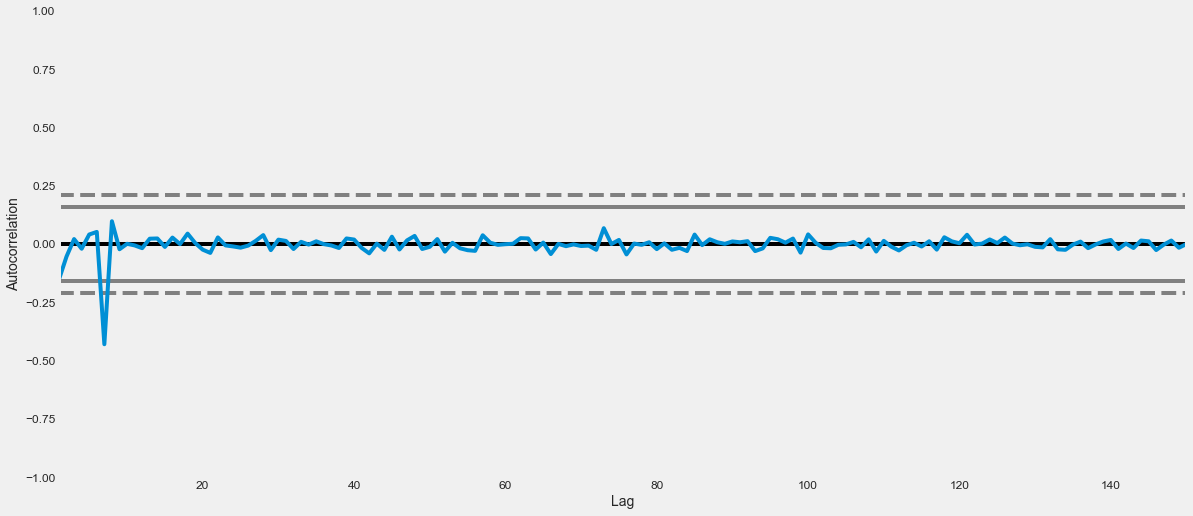

<AxesSubplot:ylabel='lb_stat'>

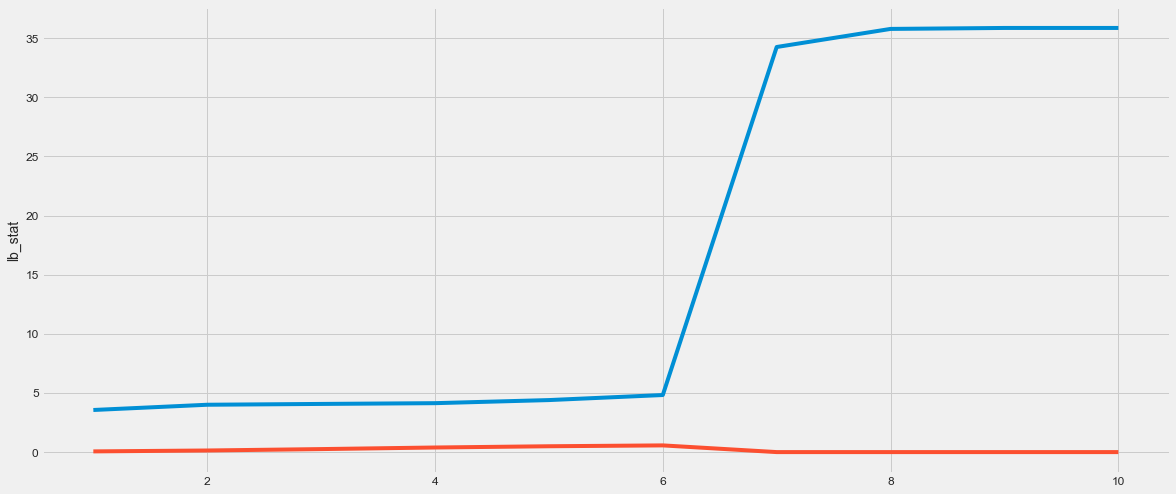

In [55]:
import statsmodels.api as sm
residual = results.resid
diagnostics = sm.stats.acorr_ljungbox(residual, lags=10, return_df= True)
print(diagnostics)
autocorrelation_plot(residual)
plt.show()
sns.lineplot(data = diagnostics["lb_stat"] )
sns.lineplot(data = diagnostics["lb_pvalue"] )


p-value > 0.05  we fail to reject the null hypothesis. That is residuals are white noise and iid indicating the non significance of the correlation. That is autocorrelation cuts off at higher lags.


In [56]:
# Train Test Generator


def rolling_forecast(train, min_train_length, horizon):
    for i in range(0, len(train) - min_train_length, 5):
        split_train = train[: min_train_length + i]
        split_val = train[min_train_length + i: min_train_length + i + horizon]
        yield split_train, split_val

SPLIT_DATE = '2021-07-01'
train = daily_resampled.loc[daily_resampled.index < SPLIT_DATE]



CV[1]
The Mean Squared Error of our forecasts is 627.68
The Root Mean Squared Error of our forecasts is 25.05
CV[2]
The Mean Squared Error of our forecasts is 230.12
The Root Mean Squared Error of our forecasts is 15.17
CV[3]
The Mean Squared Error of our forecasts is 495.64
The Root Mean Squared Error of our forecasts is 22.26
CV[4]
The Mean Squared Error of our forecasts is 36.25
The Root Mean Squared Error of our forecasts is 6.02
CV[5]
The Mean Squared Error of our forecasts is 120.11
The Root Mean Squared Error of our forecasts is 10.96
CV[6]
The Mean Squared Error of our forecasts is 136.36
The Root Mean Squared Error of our forecasts is 11.68
Average RMSE score for 6 folds:  15.190000000000003
Min RMSE score 6 folds:  6.02
Score Length  6
                                     SARIMAX Results                                     
Dep. Variable:                             TOTAL   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihoo

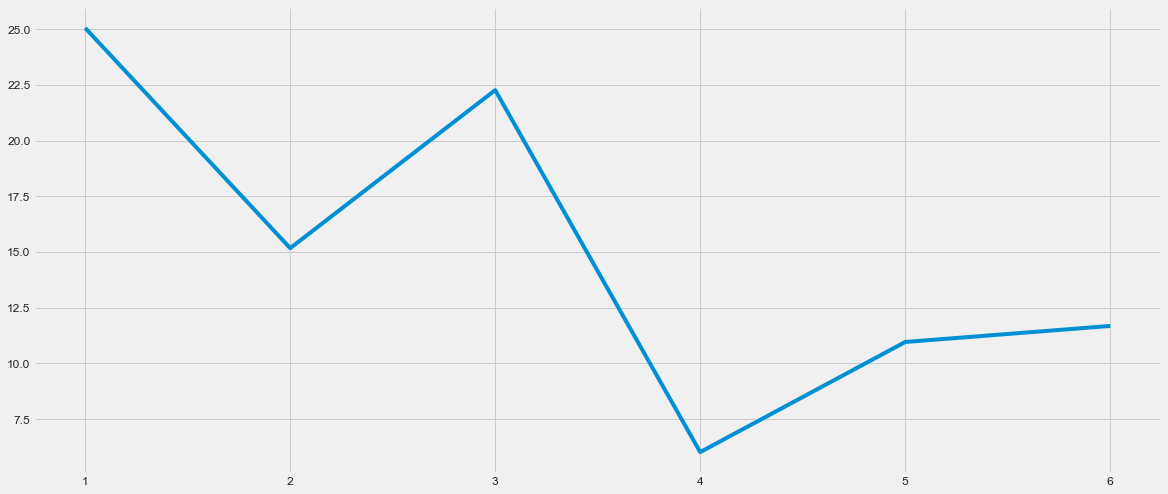

In [57]:
from numpy import mean

result_for_test = {}
def cross_validation_score(cv, order, seasonal_order):
    cv_scores = []
    i = 0
    for cv_train, cv_test in cv:
        model = sm.tsa.statespace.SARIMAX(cv_train,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        print(f'CV[{i + 1}]')
        # print(result.summary())
        y_forecasted = result.forecast(steps=len(cv_test))
        y_truth = cv_test
        mse = ((y_forecasted - y_truth) ** 2).mean()
        rmse = round(np.sqrt(mse), 2)
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
        cv_scores.append(rmse)
        result_for_test.update({rmse: result})
        i += 1
    return np.array(cv_scores)
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(1, 1, 1), seasonal_order=(0, 1, 1, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
print("Score Length ", len(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



CV[1]
The Mean Squared Error of our forecasts is 329.89
The Root Mean Squared Error of our forecasts is 18.16
CV[2]
The Mean Squared Error of our forecasts is 554.25
The Root Mean Squared Error of our forecasts is 23.54
CV[3]
The Mean Squared Error of our forecasts is 809.7
The Root Mean Squared Error of our forecasts is 28.46
CV[4]
The Mean Squared Error of our forecasts is 95.65
The Root Mean Squared Error of our forecasts is 9.78
CV[5]
The Mean Squared Error of our forecasts is 177.46
The Root Mean Squared Error of our forecasts is 13.32
CV[6]
The Mean Squared Error of our forecasts is 268.25
The Root Mean Squared Error of our forecasts is 16.38
Average RMSE score for 6 folds:  18.27333333333333
Min RMSE score 6 folds:  9.78
                                     SARIMAX Results                                     
Dep. Variable:                             TOTAL   No. Observations:                  135
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 7)   Log Likelihood                -

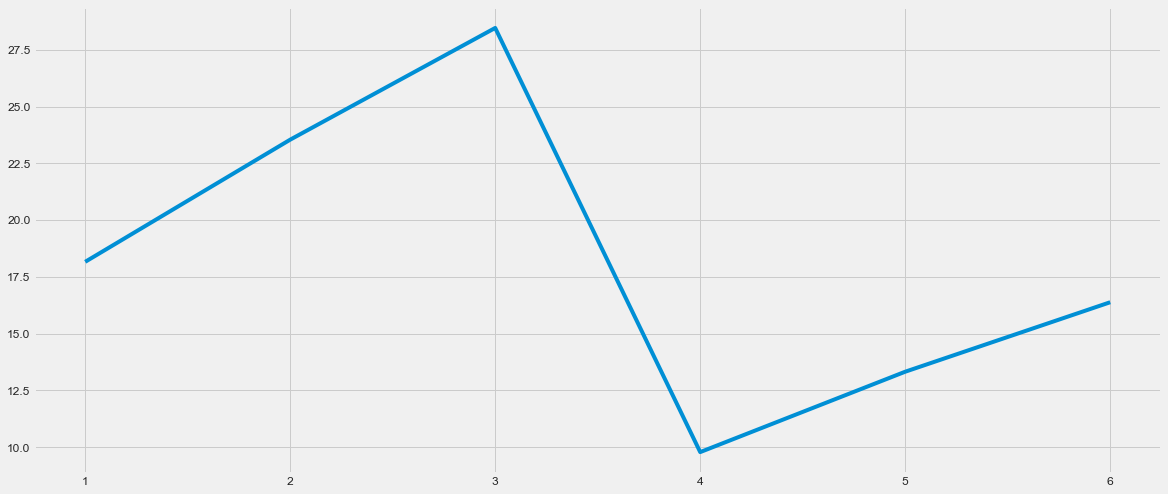

In [58]:

# Forecasting on unknown test set for specified parameters order = (0,1,2),seasonal_order =(0,2,2,7)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(0, 1, 2), seasonal_order=(0, 2, 2, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

CV[1]
The Mean Squared Error of our forecasts is 628.44
The Root Mean Squared Error of our forecasts is 25.07
CV[2]
The Mean Squared Error of our forecasts is 229.63
The Root Mean Squared Error of our forecasts is 15.15
CV[3]
The Mean Squared Error of our forecasts is 495.13
The Root Mean Squared Error of our forecasts is 22.25
CV[4]
The Mean Squared Error of our forecasts is 35.74
The Root Mean Squared Error of our forecasts is 5.98
CV[5]
The Mean Squared Error of our forecasts is 119.75
The Root Mean Squared Error of our forecasts is 10.94
CV[6]
The Mean Squared Error of our forecasts is 135.81
The Root Mean Squared Error of our forecasts is 11.65
Average RMSE score for 6 folds:  15.173333333333334
Minimum RMSE score:  5.98
                                     SARIMAX Results                                     
Dep. Variable:                             TOTAL   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -50

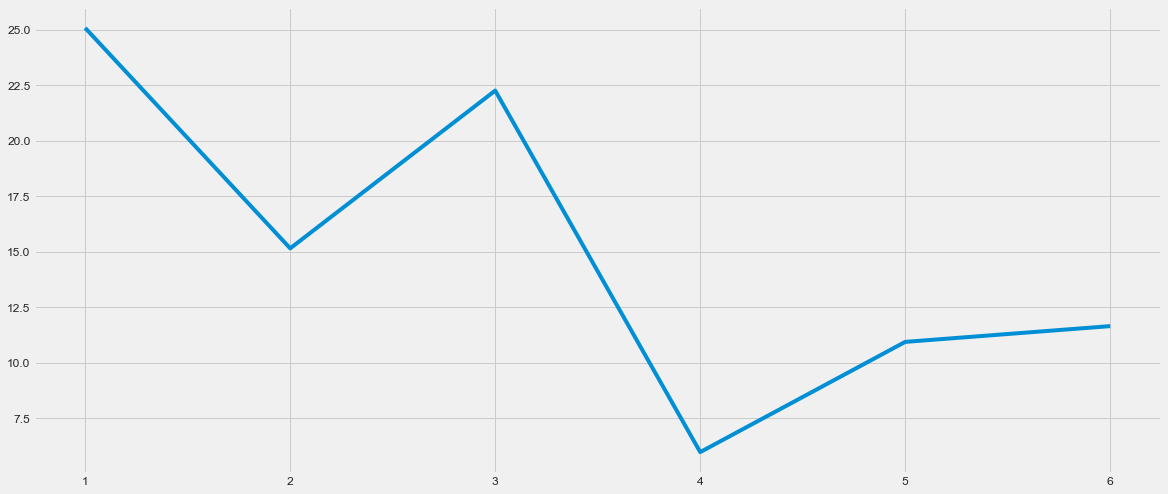

In [59]:
#Unspecified Parameters
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=param, seasonal_order=param_seasonal)
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Minimum RMSE score: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
